<!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <title>Classification Art Category</title>
    <style>
        body {
            margin: 0;
            padding: 0;
            display: flex;
            flex-direction: column;
            align-items: center;
            background-color: #000;
            color: white;
        }
        h1 {
            font-size: 5em;
            font-weight: bold;
            text-align: center;
        }
    </style>
</head>
<body>
    <h1>Classification Art Category</h1>
</body>
</html>

<!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <title>Sommaire - Classification Art</title>
    <style>
        body {
            margin: 0;
            padding: 0;
            display: flex;
            flex-direction: column;
            justify-content: center;
            align-items: center;
            height: 100vh;
            background-color: #000;
            color: white;
            font-family: Arial, sans-serif;
        }
        h1 {
            font-weight: bold;
            text-align: center;
            margin-bottom: 20px;
            font-size: 3em;
        }
        ul {
            list-style-type: none;
            text-align: center;
            font-size: 2em;
            line-height: 2em;
            margin: 0;
            padding: 0;
        }
    </style>
</head>
<body>
    <h1>Sommaire</h1>
    <ul>
        <li>1. Présentation de la base de données</li>
        <li>2. DataLoader et Data Augmentation</li>
        <li>3. Reseau FC</li>
        <li>4. Reseau CNN</li>
        <li>5. Transfer Learning</li>
    </ul>
</body>
</html>

pas touché les couches de batch lors du finetuning

# **Introduction**

- Le projet **P1 - Projet de classification** a pour objectif de développer une solution permettant de classifier des images dans des catégories originales définies par l'utilisateur. Dans le cadre de ce projet, notre thématique est la reconnaissance des mouvements d'art.

- Les mouvements d'art que nous avons choisis sont au nombre de 13, comprenant des catégories variées telles que **Realism**, **Japanese art**, **Symbolism**, **Expressionism**, entre autres. Chaque mouvement artistique possède des caractéristiques visuelles et esthétiques distinctes, ce qui en fait un défi intéressant pour une classification automatisée.

- Une fois la base d'images définie et validée, les étapes suivantes consistent à exploiter des outils et techniques avancés pour préparer et entraîner les modèles. Cela inclut la mise en place d'un **DataLoader** et l'utilisation de techniques de **Data Augmentation** pour enrichir les données d'entraînement. Les performances des modèles sont ensuite analysées en utilisant différents types de réseaux : les réseaux entièrement connectés (FC), les réseaux convolutifs (CNN), et enfin, le Transfer Learning avec des architectures pré-entraînées comme MobileNetV2.

# **Présentation de la base de données**

## **Présentation des différentes classes**

Lors du lancement du projet, nous avons cherché des mouvements d'art adéquats pour notre thématique. L'idée était de se concentrer principalement sur des mouvements liés à la peinture afin de faciliter la tâche de classification et d'éviter différents types d'art tels que la sculpture, la poterie ou autres. 

Sachant que nous faisions face à notre première contrainte liée à la nécessité d'avoir un nombre de classes supérieur à 8, nous avons identifié un total de 13 mouvements d'art différents. Ces mouvements varient en popularité, allant du **Symbolism** au **Baroque**. Parmi ces mouvements, on retrouve divers thèmes récurrents tels que l'humain, la nature, et la religion. Par exemple, dans le cadre des peintures centrées sur l'humain, les œuvres du **Rococo** et du **Romanticism** mettent particulièrement en avant des représentations de figures humaines dans des contextes variés.

Nous avons ensuite recherché suffisamment d'exemples de peintures pour garantir l'efficacité de notre modèle. L'objectif fixé était de collecter 600 peintures par catégorie. Malgré la difficulté à atteindre cet objectif pour certains mouvements moins communs comme le **Rococo**, nous avons réussi à finaliser notre base de données grâce à des sources telles que Flickr, qui a été une ressource majeure dans cette collecte.


## **Collecte des images**

La collecte des différentes images pour constituer notre base de données a nécessité plus de deux semaines de travail, totalisant environ une quinzaine d'heures de recherche active.

Cependant, certains mouvements d'art étaient particulièrement difficiles à compléter, notamment en raison de leur moindre popularité. Pour pallier ces difficultés, nous avons consacré entre 1 et 2 heures supplémentaires à explorer d'autres moyens de collecte, tels que des bases publiques alternatives ou des recherches manuelles sur des plateformes d'images. Ces efforts ont permis de garantir une base de données équilibrée, toujours avec cet objectif de 600 images par catégorie.

In [29]:
import os
import matplotlib.pyplot as plt
import random
from PIL import Image

# Chemin vers le dossier contenant la base de données
dataset_path = "dataset_600"

# Récupérer les classes (dossiers) dans le répertoire
classes = [d for d in os.listdir(dataset_path) if os.path.isdir(os.path.join(dataset_path, d))]

# Initialiser les données pour le graphique
class_counts = {}
sample_images = []

for class_name in classes:
    class_path = os.path.join(dataset_path, class_name)
    files = os.listdir(class_path)
    class_counts[class_name] = len(files)
    
    # Prendre quelques images aléatoires pour l'affichage
    sample_images.extend([os.path.join(class_path, f) for f in random.sample(files, min(3, len(files)))])

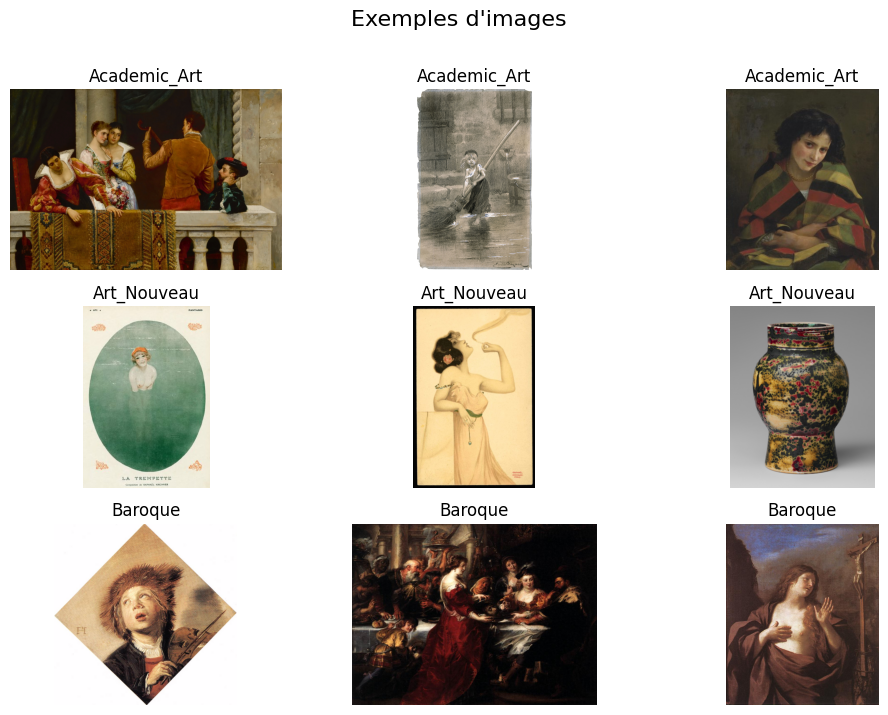

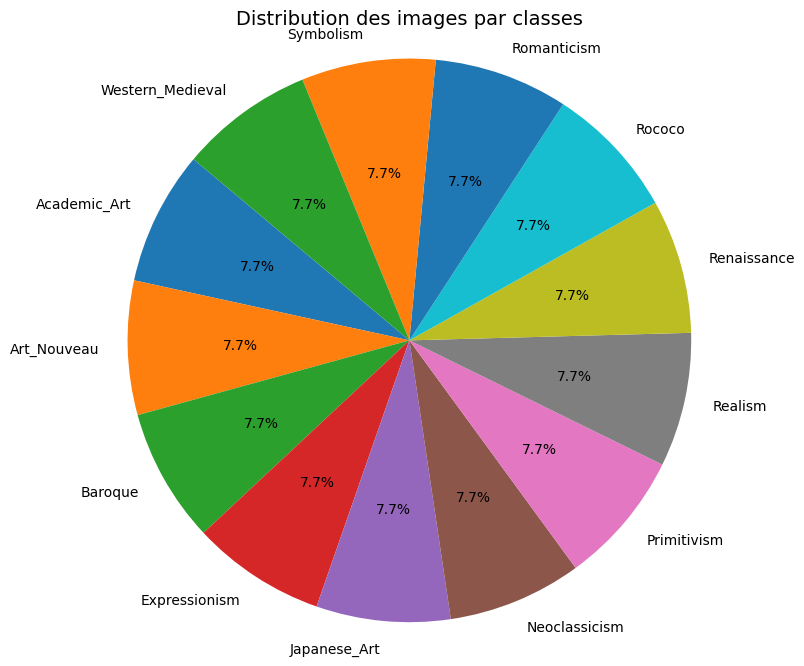

In [30]:
from ArtLib.artlib import show_sample_images,plot_pie_chart

# Affichage des résultats
show_sample_images(sample_images)
plot_pie_chart(class_counts)

# **DataLoader et DataAugmentation**

### **Mise en place du DataLoader**

- **Chargement des données :** Utilisation de image_dataset_from_directory pour charger les images du répertoire, avec redimensionnement automatique à ```128x128 pixels```.

- **Ensembles d'entraînement/validation :** Division automatique ```(80%/20%)``` des données grâce à l'argument validation_split.

- **Classes détectées :** Identification automatique des mouvements d'art via les noms des sous-dossiers.

- **Batching :** Création de lots de ```64 images```, prêts pour le processus d'apprentissage.

- **Visualisation :** Fonction show_samples pour afficher un batch d'images avec leurs étiquettes pour validation visuelle.

In [31]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

from tensorflow.keras.utils import image_dataset_from_directory
from tensorflow.keras.models import Sequential
from tensorflow.keras import Input
from tensorflow.keras import layers
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import SparseCategoricalCrossentropy

In [32]:
INPUT_SHAPE = (224,224)
BATCH_SIZE = 64
NUM_CLASSES = 13

In [33]:
train, valid = image_dataset_from_directory(
                        directory = dataset_path,
                        batch_size=BATCH_SIZE,
                        image_size=INPUT_SHAPE,
                        validation_split=0.2,
                        subset='both',
                        seed = 14
            )

Found 7800 files belonging to 13 classes.
Using 6240 files for training.
Using 1560 files for validation.


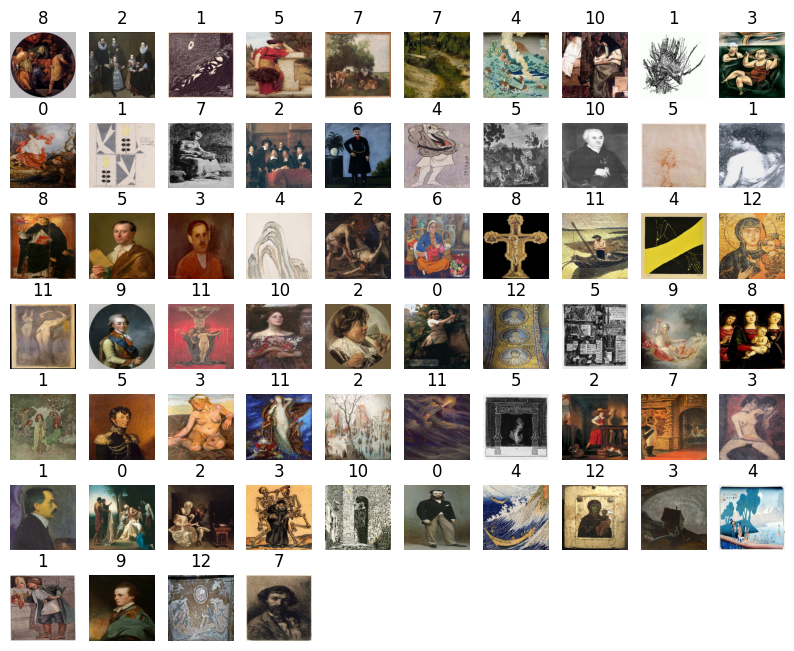

In [34]:
from ArtLib.artlib import ShowSamples

# Affichage d'échantillons du jeu d'entraînement
ShowSamples(train)

L'image montre un batch de ```64 échantillons```, ce qui correspond à la taille de lot spécifiée lors de la configuration du DataLoader. Ces images appartiennent à l'une des ```13 classes``` représentant les différents mouvements d'art, avec des étiquettes numériques allant de 0 à 12, identifiant chaque mouvement.

Cependant, sans connaissances approfondies en histoire de l'art, il peut être difficile de distinguer à quel mouvement certaines œuvres appartiennent. Cela s'explique par les similarités visuelles entre les œuvres de différents mouvements, notamment en ce qui concerne les thèmes récurrents (par exemple, les représentations humaines ou naturelles), les palettes de couleurs similaires ou les styles artistiques proches.

### **Ajout de la Data Augmentation**

In [35]:
data_augmentation_layers = [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
]

def data_augmentation(images):
        for layer in data_augmentation_layers:
                images = layer(images)
        return images

augmented_train = train.map( lambda x, y: (data_augmentation(x), y))

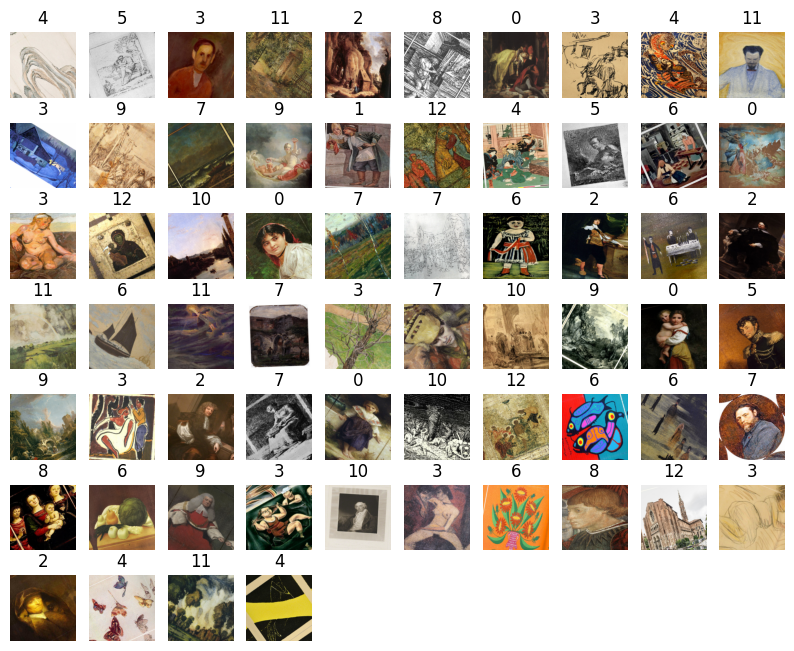

In [36]:
ShowSamples(augmented_train)

# **Reseau FC & CNN**

### **Déclaration des fonctions**

In [37]:
def build_fc_model(dropout = False):
    """
    Construit un modèle entièrement connecté (Fully Connected Network) avec des améliorations pour mieux capturer les caractéristiques des données et limiter le surapprentissage.

    Parameters:
        input_shape (tuple): La forme des données d'entrée sans les canaux (par ex., (128, 128) pour des images RGB de 128x128).
        num_classes (int): Nombre de classes à prédire (13 dans ce cas).

    Returns:
        model: Modèle Keras compilé.
    """
    # Compléter dynamiquement la troisième dimension (canaux de couleur)
    input_shape = (*INPUT_SHAPE, 3)  # Ajoute la troisième dimension

    # Construction du modèle
    model = Sequential()

    # Entrée et prétraitement
    model.add(Input(shape=input_shape))
    model.add(layers.Rescaling(1.0 / 255))  # Normalisation des pixels entre 0 et 1

    # Extraction de caractéristiques via plusieurs couches denses
    model.add(layers.Flatten())
    model.add(layers.Dense(256, activation="relu"))
    if dropout:
        model.add(layers.Dropout(0.3))  # Dropout pour limiter le surapprentissage

    model.add(layers.Dense(128, activation="relu"))
    model.add(layers.BatchNormalization())  # Normalisation pour stabiliser l'entraînement
    if dropout:    
        model.add(layers.Dropout(0.3))

    model.add(layers.Dense(64, activation="relu"))
    if dropout:
        model.add(layers.Dropout(0.2))

    return model


In [38]:
def build_cnn_model(dropout=False):
    """
    Construit un modèle CNN simple pour la classification d'images.

    Parameters:
        input_shape (tuple): La forme des données d'entrée sans les canaux (par ex., (128, 128) pour des images RGB de 128x128).
        num_classes (int): Nombre de classes à prédire (13 dans ce cas).
        learning_rate (float): Taux d'apprentissage pour l'optimiseur.
        dropout (bool): Indique si le Dropout doit être activé.

    Returns:
        model: Modèle Keras compilé.
    """
    model = Sequential()

    # Prétraitement
    model.add(Input(shape=(*INPUT_SHAPE, 3)))  # Ajoute la troisième dimension (canaux de couleur)
    model.add(layers.Rescaling(1.0 / 255))  # Normalisation des pixels

    # Bloc Convolutionnel 1
    model.add(layers.Conv2D(32, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    if dropout:
        model.add(layers.Dropout(0.25))

    # Bloc Convolutionnel 2
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    if dropout:
        model.add(layers.Dropout(0.25))

    # Aplatissement pour couches Fully Connected
    model.add(layers.Flatten())
    model.add(layers.Dense(128, activation='relu'))
    if dropout:
        model.add(layers.Dropout(0.5))

    return model


In [39]:
from tensorflow.keras.applications import MobileNetV2

# Prétraitement des données pour MobileNetV2
preprocess_input = tf.keras.applications.mobilenet_v2.preprocess_input


def build_mobilenetv2(dropout=False):
    
    # Charger MobileNetV2 avec des poids pré-entraînés
    base_model = MobileNetV2(
        input_shape=INPUT_SHAPE + (3,), 
        include_top=False,
        weights="imagenet"
    )
    base_model.trainable = False

    model = Sequential()

    model.add(base_model)
    model.add(layers.GlobalAveragePooling2D())
    if dropout:
        model.add(layers.Dropout(0.3)) 
    model.add(layers.Dense(128))
    if dropout:
        model.add(layers.Dropout(0.3))
    
    return model

In [40]:
import itertools
import pandas as pd

def generate_hyperparameter_combinations(learning_rates):
    """
    Génère des combinaisons d'hyperparamètres pour tester différents modèles.

    Returns:
        list[dict]: Liste de dictionnaires contenant les combinaisons d'hyperparamètres.
    """
    dropout_options = [True, False]
    data_augmentation = [True, False]
    combinations = list(itertools.product(learning_rates, dropout_options, data_augmentation))
    return [
        {"learning_rate": lr, "dropout": do, "data_augmentation": da}
        for lr, do, da in combinations
    ]

In [41]:
def train_model(model_type,train, augmented_train, valid, params):
    """
    Entraîne un modèle et retourne un dictionnaire contenant les métriques d'entraînement et de validation.

    Parameters:
        train (tf.data.Dataset): Jeu de données normal.
        augmented_train (tf.data.Dataset): Jeu de données avec augmentation.
        valid (tf.data.Dataset): Jeu de données de validation.
        params (dict): Hyperparamètres du modèle.

    Returns:
        dict: Dictionnaire contenant les hyperparamètres, les métriques d'entraînement et de validation.
    """
    print(params)
    epochs = 3
    dataset = augmented_train if params["data_augmentation"] else train

    if model_type == 'FC':
        model = build_fc_model(params["dropout"])

    if model_type == 'CNN':
        model = build_cnn_model(params["dropout"])

    if model_type == 'TL':
        epochs = 5
        dataset = dataset.map(lambda x, y: (preprocess_input(x), y))
        valid = valid.map(lambda x, y: (preprocess_input(x), y))
        model = build_mobilenetv2(params["dropout"])
        
    # Couche de sortie
    model.add(layers.Dense(NUM_CLASSES, activation="softmax"))  # Activation pour classification multi-classe

    # Compilation du modèle
    model.compile(
        optimizer=Adam(learning_rate=params["learning_rate"]),  # Taux d'apprentissage modifiable
        loss=SparseCategoricalCrossentropy(from_logits=False),  # from_logits=False pour softmax
        metrics=['accuracy']
    )
 
    # Entraînement avec l'ensemble de validation
    history = model.fit(
        dataset,
        validation_data=valid,  # Utilisation directe de `valid` comme ensemble de validation
        epochs=epochs,
        verbose = 1,
    )
    
    # Récupérer toutes les métriques
    return {
        **params,
        "final_loss": history.history["loss"][-1],            # Dernière perte sur l'entraînement
        "final_accuracy": history.history["accuracy"][-1],    # Dernière précision sur l'entraînement
        "final_val_loss": history.history["val_loss"][-1],    # Dernière perte sur la validation
        "final_val_accuracy": history.history["val_accuracy"][-1]  # Dernière précision sur la validation
    }

In [42]:
def train_all_models(model_type,hyperparams, train, augmented_train,valid):
    """
    Itère sur les combinaisons d'hyperparamètres, entraîne les modèles, et retourne un DataFrame.

    Parameters:
        hyperparams (list[dict]): Liste des combinaisons d'hyperparamètres.
        train (tf.data.Dataset): Jeu de données normal.
        augmented_train (tf.data.Dataset): Jeu de données avec augmentation.
        input_shape (tuple): Forme des données d'entrée.
        num_classes (int): Nombre de classes de sortie.
        epochs (int): Nombre d'époques pour l'entraînement.

    Returns:
        pd.DataFrame: DataFrame contenant les performances pour chaque configuration.
    """
    results = [
        train_model(model_type,train, augmented_train, valid,params)
        for params in hyperparams
    ]
    return pd.DataFrame(results)

# **Réseau - FC**

In [49]:
from IPython.display import Image, display

In [50]:
# learning_rates = [0.01, 0.001, 0.0001]
# hyperparams = generate_hyperparameter_combinations(learning_rates)
# final_results = train_all_models(
#     model_type="FC",
#     hyperparams=hyperparams,
#     train=train,
#     augmented_train=augmented_train,
#     valid=valid
# )

In [51]:
# sorted_df = final_results.sort_values(by="final_val_accuracy", ascending=False)
# sorted_df

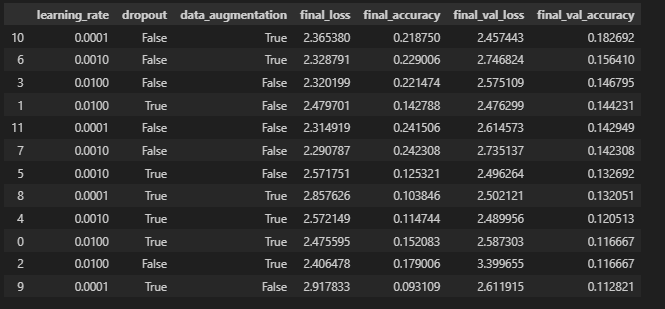

In [52]:
# Chemin vers le fichier PNG
image_path = "image/resultat_FC.png"

# Afficher l'image
display(Image(filename=image_path))

### **Analyse des Performances du Modèle**

Le modèle utilisé ici est un réseau de neurones entièrement connecté (fully connected), ce qui est une architecture relativement simple pour une tâche de classification d’images. De plus, le dataset comporte 13 classes, ce qui complexifie davantage la tâche. Ces éléments expliquent en grande partie les performances globalement faibles observées, avec des précisions de validation qui ne dépassent pas 18%. Dans ce contexte, il est attendu que le modèle ait des difficultés à bien capturer les patterns visuels des images et à généraliser efficacement.

### **Impact du Dropout  et de la Data Augmentation**

L’introduction du ```dropout``` et de la ```data augmentation``` vise respectivement à réduire le surapprentissage et à enrichir l’ensemble d’entraînement en simulant des variations des images. Cependant, leur impact est limité ici.

- Certains modèles avec ```data augmentation``` obtiennent de meilleures précisions de validation (```learning_rate = 0.0001```, ```dropout = False```, ```data_augmentation = True```, ```final_val_accuracy = 0.182692```), ce qui suggère que cette technique aide légèrement à la généralisation. Toutefois, d’autres combinaisons avec data augmentation montrent des performances plus faibles, indiquant que l’effet dépend aussi d’autres hyperparamètres.

- Concernant le ```dropout```, son effet est mitigé. Bien qu’il soit conçu pour éviter l’overfitting, il semble dans certains cas trop contraindre l’apprentissage, rendant le modèle encore moins performant (```learning_rate = 0.0001```, ```dropout = True```, ```data_augmentation = True```, ```final_val_accuracy = 0.132051```). Ce résultat peut être dû au fait que, sur un réseau déjà simple, masquer trop de neurones peut empêcher le modèle d’apprendre efficacement des représentations significatives.

### **Impact du Learning Rate**

Le learning rate joue un rôle crucial dans la convergence du modèle.

- Les meilleurs résultats en termes de précision de validation sont obtenus avec un learning rate faible (0.0001), ce qui indique que le modèle apprend mieux lorsque l’optimisation est plus progressive.

- À l’inverse, des valeurs plus élevées comme 0.01 entraînent généralement une perte de validation plus importante, suggérant que l’apprentissage est trop rapide et instable, ce qui empêche le modèle de converger vers des solutions optimales.

Un ajustement plus précis du learning rate (avec du decay ou un scheduler adaptatif) pourrait potentiellement améliorer les résultats.

### **Présence d’Overfitting**

L’analyse des pertes montre que plusieurs modèles souffrent d’overfitting, un phénomène classique lorsque le réseau est trop simple pour bien généraliser sur un dataset complexe. Cela se manifeste par :

- Une perte d’entraînement relativement faible, mais une perte de validation élevée.
- Des cas où la précision d’entraînement est bien meilleure que la précision de validation.

Par exemple, avec ```learning_rate = 0.01```, ```dropout = False```, ```data_augmentation = True```, on observe une perte d’entraînement de 2.40 mais une perte de validation de 3.39, ce qui montre un modèle qui s’adapte bien aux données d’entraînement mais échoue à généraliser.

# **Réseau - CNN**

In [53]:
# hyperparams = generate_hyperparameter_combinations(learning_rates=[0.001,0.0007,0.0003])
# final_results = train_all_models(
#     model_type="CNN",
#     hyperparams=hyperparams,
#     train=train,
#     augmented_train=augmented_train,
#     valid=valid
# )

In [54]:
# sorted_df = final_results.sort_values(by="final_val_accuracy", ascending=False)
# sorted_df

# **Transfert Learning**

In [55]:
# hyperparams = generate_hyperparameter_combinations(learning_rates=[0.001])
# print(hyperparams)
# final_results = train_all_models(
#     model_type="TL",
#     hyperparams=hyperparams,
#     train=train,
#     augmented_train=augmented_train,
#     valid=valid
# )

In [56]:
# sorted_df = final_results.sort_values(by="final_val_accuracy", ascending=False)
# sorted_df

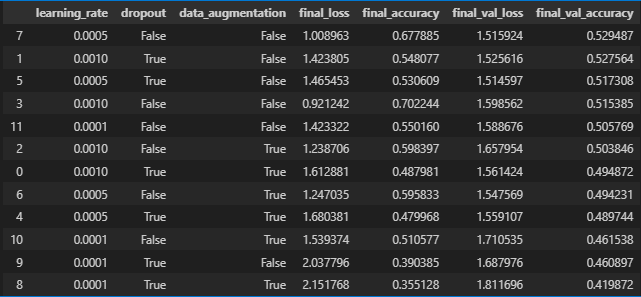

In [57]:
# Chemin vers le fichier PNG
image_path = "image/resultat_TL.png"

# Afficher l'image
display(Image(filename=image_path))

### **Analyse des Performances du Modèle**

Contrairement au modèle fully connected, ici, nous utilisons MobileNetV2 en transfert learning. Cette approche permet de tirer parti des caractéristiques pré-apprises sur ImageNet, ce qui est particulièrement bénéfique pour un dataset complexe à 13 classes. En conséquence, les performances observées sont nettement meilleures par rapport au modèle précédent, bien que des variations existent en fonction des hyperparamètres.

### **Performance globale**

D'une manière générale, les performances de ce modèle sont bien supérieures à celles du réseau fully connected, avec des précisions de validation (final_val_accuracy) atteignant jusqu'à 0.529487. Cela montre que MobileNetV2 est capable d'extraire des caractéristiques pertinentes et d'obtenir une meilleure généralisation.

Toutefois, les pertes sur l’entraînement et la validation restent relativement élevées (autour de 1.0 - 2.1), ce qui indique que le modèle n'a pas encore atteint une convergence optimale. Un entraînement plus long ou un ajustement plus fin du learning rate pourrait encore améliorer ces résultats.

### **Impact du Dropout et de la Data Augmentation**

L'utilisation de la data augmentation n'a pas eu d'impact aussi évident qu'avec le modèle fully connected. Certains modèles avec data augmentation affichent des performances proches, voire légèrement inférieures, à ceux qui n'en utilisent pas. Par exemple :

- **Sans data augmentation**, ```learning_rate = 0.0005```, ```dropout = False``` donne 0.529487 en précision de validation.
- **Avec data augmentation**, ```learning_rate = 0.0005```, ```dropout = True``` descend à 0.517308.

Cela peut s'expliquer par le fait que MobileNetV2 est déjà un modèle bien entraîné, et que la data augmentation perturbe parfois son apprentissage en ajoutant une trop grande variabilité.

Concernant le dropout, les résultats sont partagés :

- Dans certains cas, le dropout semble réduire les performances (```learning_rate = 0.0001```, ```dropout = True```, ```data_augmentation = True``` avec 0.419872 en précision de validation).
- D'autres résultats montrent une amélioration sans dropout, suggérant que le modèle ne souffre pas nécessairement d'overfitting, ce qui est logique avec MobileNetV2 qui est déjà régularisé.

### **Impact du Learning Rate**

Le learning rate joue ici encore un rôle clé. On observe que :

- Un learning rate modéré (0.0005 - 0.001) semble donner les meilleurs résultats.
- Un learning rate trop faible (0.0001) semble entraîner une perte de performance, ce qui indique que le modèle n'apprend pas suffisamment vite.

Par exemple :

- 0.0005 sans dropout ni data augmentation donne 0.529487 en précision de validation.
- 0.0001 avec data augmentation descend jusqu'à 0.419872.

Ainsi, il semble qu’un learning rate plus élevé (0.0005 - 0.001) soit mieux adapté pour ce transfert learning.

### **Présence d’Overfitting**

L’overfitting semble assez important dans certains cas :

- Certains modèles affichent une bonne précision d’entraînement (0.67 - 0.70) mais une précision de validation plus basse (0.50 - 0.52).
- L'écart entre la perte d'entraînement et la perte de validation reste notable dans certains cas, indiquant que le modèle mémorise encore un peu trop les données d'entraînement.